In [291]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def openfile(file):    
    listadefinida = []
    with open(file, 'r') as archivo:
        file_read = archivo.read().split('\n')
    file_read_split = [x.split(',') for x in file_read]
    for elem in file_read_split:
        if len(elem) == 6 and elem[2] != ' Control_c' and elem[2] != ' Header':
            listadefinida.append(elem)
    return listadefinida

def sacar_silencios_alpedo(lista):
    lista_sin_modulo= []
    for x in range(0, len(lista) - 10):
        if int(lista[x][1]) % 2 == 0 or (int(lista[x+1][1]) - (int(lista[x][1])) >= 120):
            lista_sin_modulo.append(lista[x])
    return lista_sin_modulo

def hacer_int(lista):
    for elem in lista:
        for x in range(0,6):
            try:
                elem[x] = int(elem[x])
            except ValueError as verr:
                pass # do job to handle: s does not contain anything convertible to int
            except Exception as ex:
                pass # do job to handle: Exception occurred while converting to int
    return lista

def silencio_en_lugar(lista):
    for elem in lista:
        if elem[5] == 0:
            elem[4] = None
    for elem in lista:
        if elem[1] % 2 != 0:
            elem[1] = elem[1] + 1
    return lista
def numero_de_compas(lista, compas):
    for elem in lista:
        numerodecompas = np.floor_divide(elem[1],compas)
        if len(elem) == 6:
            elem.append(numerodecompas + 1)
        else:
            pass
    for elem in lista:
        if len(elem) == 7:
            elem.append(elem[1] % compas)
        else:
            pass
    return lista


480 ticks per quartet note:
4/4 = 1920
3/4 = 1440
2/4 = 980

In [292]:
ave_dulc = openfile('ave_dulccissima.txt')
ave_dulc = sacar_silencios_alpedo(ave_dulc)
ave_dulc = hacer_int(ave_dulc)
ave_dulc_fix = silencio_en_lugar(ave_dulc)

In [293]:
bach_motfin = openfile('bach_bwv_227.txt')
bach_motfin = sacar_silencios_alpedo(bach_motfin)
bach_motfin = hacer_int(bach_motfin)
bach_motfin_fix = silencio_en_lugar(bach_motfin)

In [294]:
desprez_nymphes = openfile('josquin_bois.txt')
desprez_nymphes = sacar_silencios_alpedo(desprez_nymphes)
desprez_nymphes = hacer_int(desprez_nymphes)        
desprez_nymphes_fix = silencio_en_lugar(desprez_nymphes)


In [295]:
quant_en_moi = openfile('quant_en_moi.txt')
quant_en_moi = sacar_silencios_alpedo(quant_en_moi)
quant_en_moi = hacer_int(quant_en_moi)
quant_en_moi_fix = silencio_en_lugar(quant_en_moi)


# Densidad Cronométrica:

##  $$evento \over Dt$$

evento se traduce en lista acción; vector en el array. Hay que seleccionar que unidad de tiempo parece ser la correcta. La unidad de clicks per negra parece ser correcto.
- Bach, Dulccisima en 4 = 1920
- Quant en moi en 9 = 4320
- Desprez en 8 = 3840 ACRODATE QUE REDONDA = 60



In [296]:
bach_dulc = 1920
quant = 1440
desprez = 3840 * 2
negra = 480
corchea = 240
#Columna 6 es el numero de compas por division entera
#Columna 7 es el modulo en relacion al compás
ave_dulc_ncomp = numero_de_compas(ave_dulc_fix, bach_dulc)
bach_motfin_ncomp = numero_de_compas(bach_motfin_fix, bach_dulc)
desprez_nymphes_ncomp = numero_de_compas(desprez_nymphes_fix, desprez)
quant_en_moi_ncomp = numero_de_compas(quant_en_moi_fix, quant)
 
#Por unidad
ave_dulc_nuni = numero_de_compas(ave_dulc_fix, corchea)
bach_motfin_nuni = numero_de_compas(bach_motfin_fix, corchea)
desprez_nymphes_nuni = numero_de_compas(desprez_nymphes_fix, negra)
quant_en_moi_nuni = numero_de_compas(quant_en_moi_fix, corchea)

In [297]:
# Densidad cronométrica por diccionario.

def eventos_por_compas(lista):
    ev_pcompas = {}
    for elem in lista:
        if elem[6] in ev_pcompas:
            ev_pcompas[elem[6]] = ev_pcompas[elem[6]] + 1
        else:
            ev_pcompas[elem[6]] = 1
    return ev_pcompas


ave_epc = eventos_por_compas(ave_dulc_ncomp)
bach_epc = eventos_por_compas(bach_motfin_ncomp)
desprez_epc = eventos_por_compas(desprez_nymphes_ncomp)
quant_epc = eventos_por_compas(quant_en_moi_ncomp)

'''
plt.figure(figsize=(20,5))
plt.plot(list(desprez_epc.values()))
'''

'\nplt.figure(figsize=(20,5))\nplt.plot(list(desprez_epc.values()))\n'

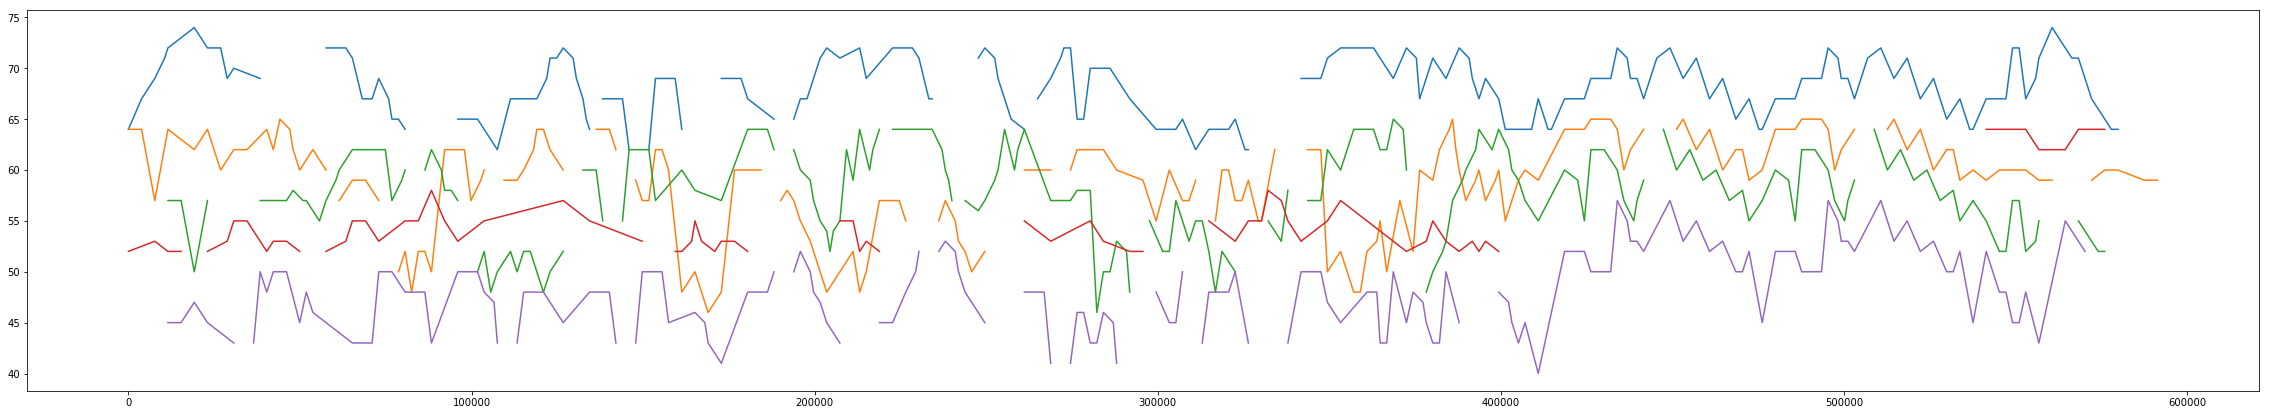

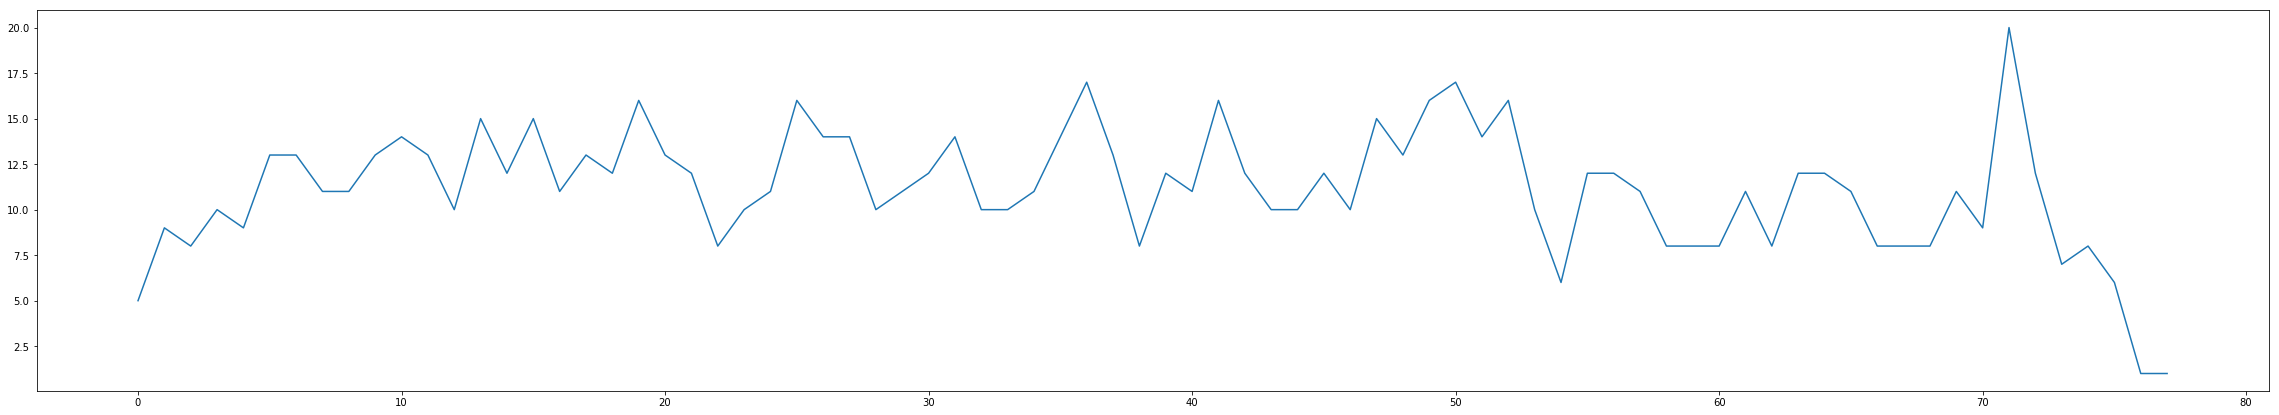

In [298]:
def plot_t_n(lista):    
    return plt.plot([x[1] for x in lista], [y[4] for y in lista])
plt.figure(figsize=(40,7))
plot_t_n(desprez_nymph_sop)
plot_t_n(desprez_nymph_alt)
plot_t_n(desprez_nymph_ten)
plot_t_n(desprez_nymph_ten2)
plot_t_n(desprez_nymph_bass)
plt.figure(figsize=(40,7))
plt.plot(list(desprez_epc.values()))

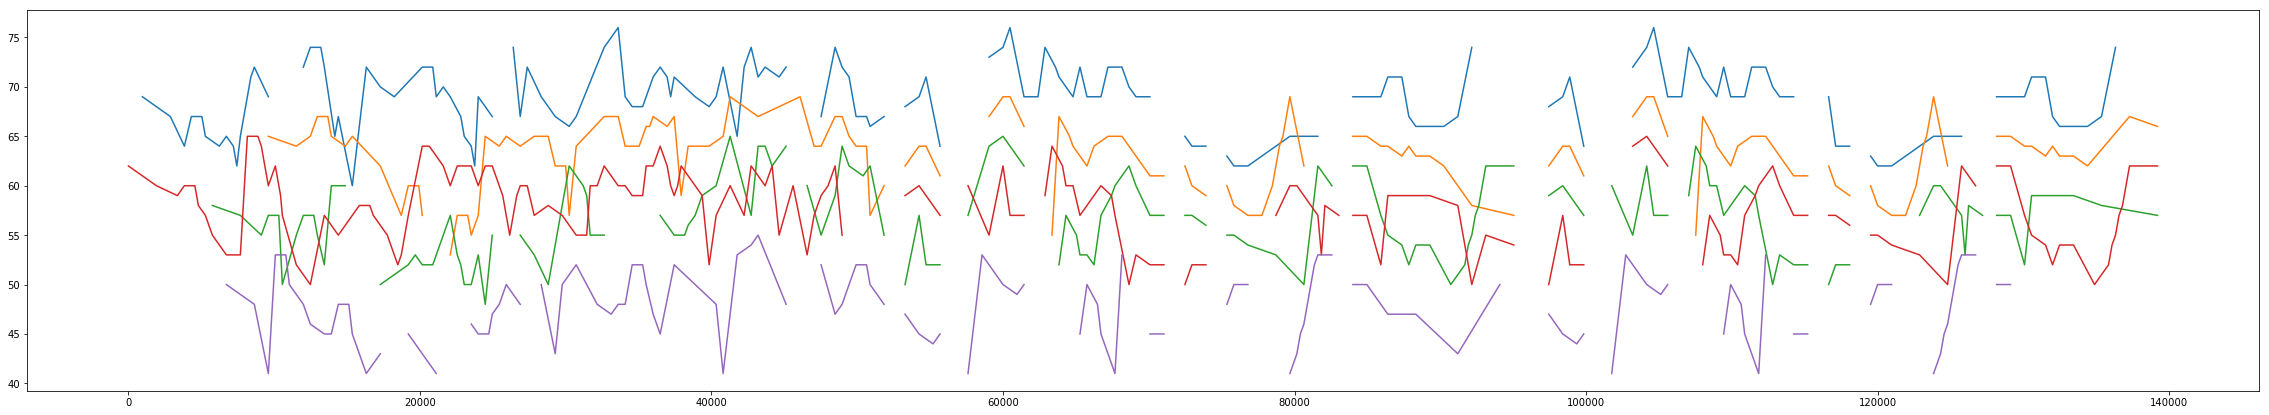

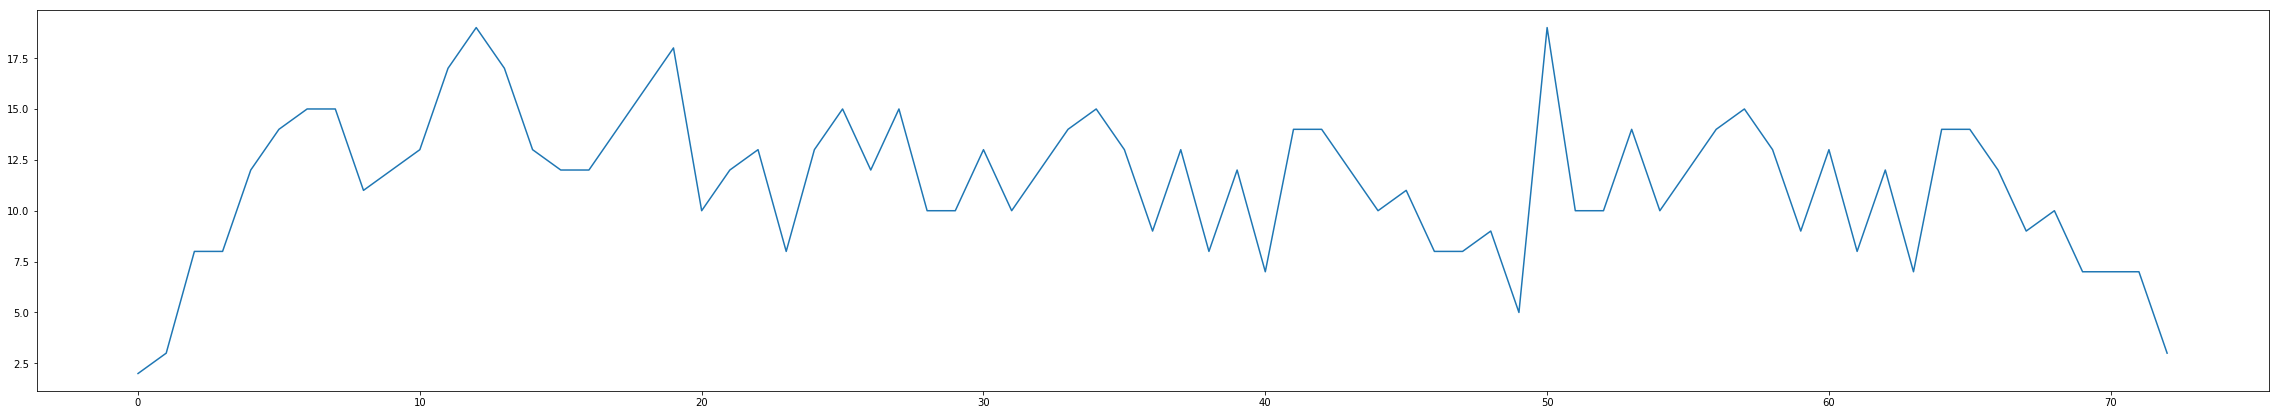

In [299]:
plt.figure(figsize=(40,7))
plot_t_n(ave_dulc_sop)
plot_t_n(ave_dulc_alt)
plot_t_n(ave_dulc_ten)
plot_t_n(ave_dulc_ten2)
plot_t_n(ave_dulc_bass)
plt.figure(figsize=(40,7))
plt.plot(list(ave_epc.values()))

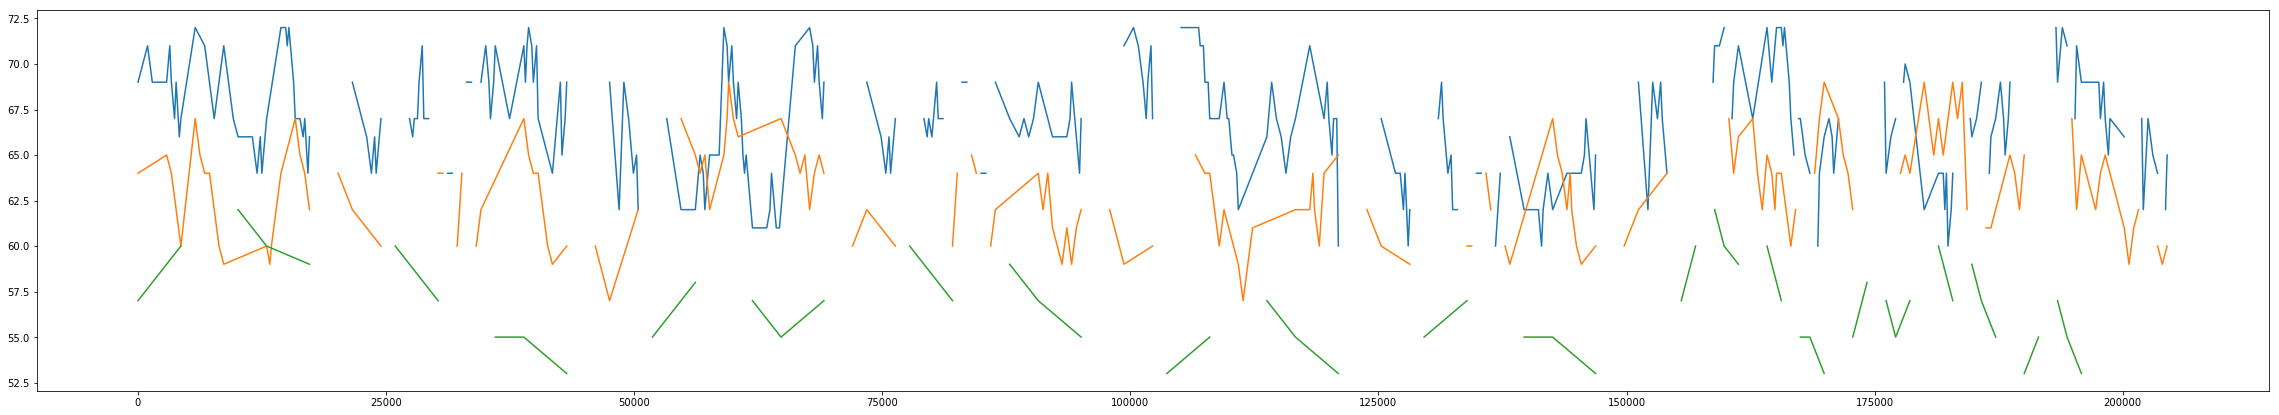

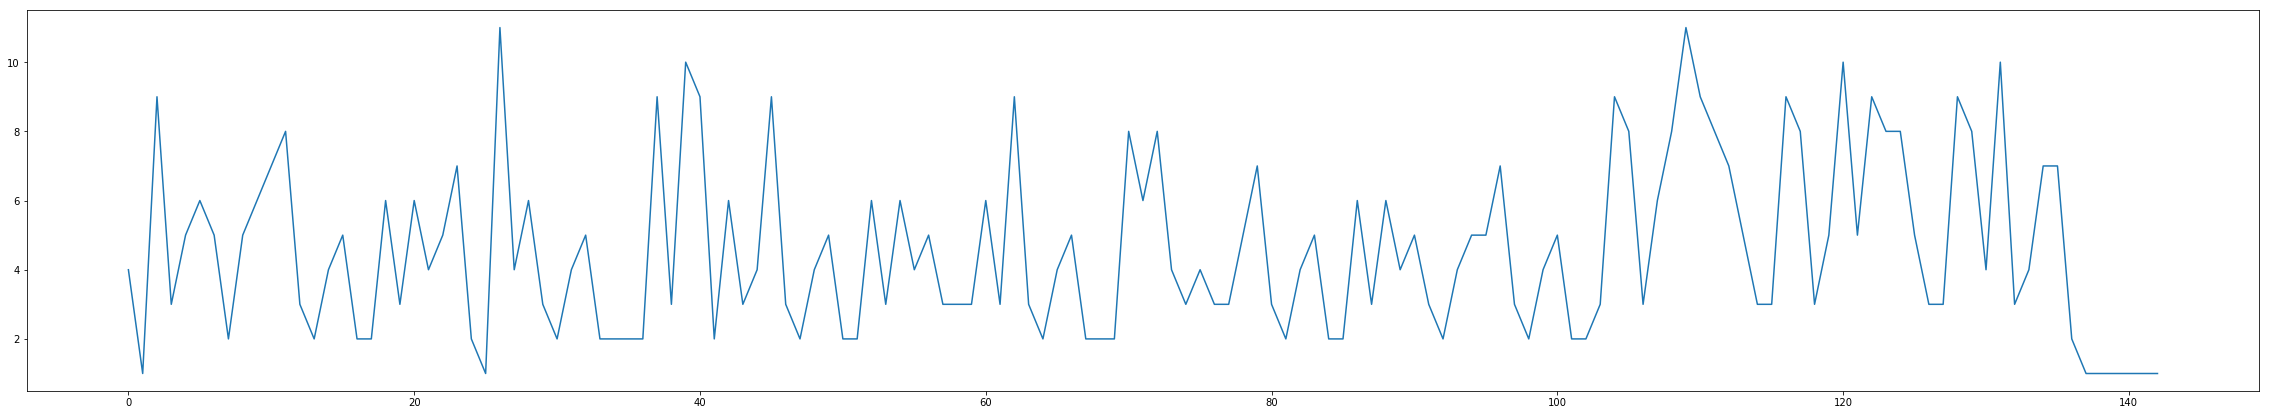

In [300]:
plt.figure(figsize=(40,7))
plot_t_n(quant_triplum)
plot_t_n(quant_motetus)
plot_t_n(quant_tenor)
plt.figure(figsize=(40,7))
plt.plot(list(quant_epc.values()))

#columna falsa que diga la duracion, thick t+1 - thick

# Ataques simultáneos

In [301]:
#Contemplar la posibilidad de utilizar las columnas de compás y momento dentro.
def notas_mismotiempo(lista, columnatiempo):
    notas_tiempo = {}
    for elem in lista:
        if elem[columnatiempo] in notas_tiempo:
            notas_tiempo[elem[columnatiempo]].append(elem[4])
        else:
            notas_tiempo[elem[columnatiempo]] = [elem[4]]
    return notas_tiempo

ave_dulc_nt = notas_mismotiempo(ave_dulc_ncomp,1)


In [302]:
def ataques_simultaneos(dictionario):
    ataquesincero = []
    for elem in dictionario.values():
        ataquesincero.append(len(elem))
    ataquesincero.insert(0,0)
    return ataquesincero

In [303]:
# Misa lhomme armé
# kein freud
# adorna talaum tuum
# bonjour lassus
# solo e pensoso

# Armonia, ventana temporal y hacer clasificacion intervalica, entre 1 y 2, entre 2 y 3, entre 3 y 4, 
# Variable root tiene el midi note de la primera, hacer una columna que haga nota actual menos root, de ahi gtado de pitch class de cada nota 
# Comparacion del mismo tiempo y hacer contexto armonia
# PITCH RELATIVO AL ROOT
# De ahi los acordes, 
# Ordenar las veces de apariciones y medir cual mas aparece: tonica, dominante
# Relacionar las armonias mas comunes con densidad cronometrica
# Centroides armonicos

# Note from root

In [321]:
def notefromroot(lista):
    root = lista[0][4]
    for elem in lista:
        if elem[4] != None and len(elem) == 8:
            elem.append(abs(elem[4] - root))
    return lista

for elem in ave_dulc_ncomp:
    while len(elem) > 9:
        del elem[-1]
        
desprez_nym_nfr = notefromroot(desprez_nymphes_ncomp)
quant_en_moi_nfr = notefromroot(quant_en_moi_ncomp)
ave_dulc_nfr = notefromroot(ave_dulc_ncomp)

def notafromroot_mismotiempo(lista, columnatiempo):
    notas_tiempo = {}
    for elem in lista:
        if elem[columnatiempo] in notas_tiempo and elem[4] != None:
            notas_tiempo[elem[columnatiempo]].append(elem[8])
        elif elem[4] != None:
            notas_tiempo[elem[columnatiempo]] = [elem[8]]
    return notas_tiempo

desprez_nfr = notafromroot_mismotiempo(desprez_nym_nfr, 1)

# Separación de voces y normalización

In [322]:
# Graficando normalizadamente

def normalizar(lista):
    eje = []
    eje.extend([None] * lista[0][1])
    for i in range(len(lista)-1):
        eje.extend([lista[i][4]] * (lista[i + 1][1] - lista[i][1]))
    eje.extend([lista[-1][4]] * 1920)
    return eje

In [306]:
def voz_sep(lista, vozdeseada):
    voz1 = []
    voz2 = []
    voz3 = []
    voz4 = []
    voz5 = []
    for elem in lista:
        if elem[0] == 1:
            voz1.append(elem)
        elif elem[0] == 2:
            voz2.append(elem)
        elif elem[0] == 3:
            voz3.append(elem)
        elif elem[0] == 4:
            voz4.append(elem)
        elif elem[0] == 5:
            voz5.append(elem)
    if vozdeseada == 1:
        return voz1
    elif vozdeseada == 2:
        return voz2
    elif vozdeseada == 3:
        return voz3
    elif vozdeseada == 4:
        return voz4
    elif vozdeseada == 5:
        return voz5


In [307]:
def voz_sep_graph(lista):
    voz1 = []
    voz2 = []
    voz3 = []
    voz4 = []
    voz5 = []
    listanueva = []
    for elem in lista:
        if elem[0] == 1:
            voz1.append(elem)
        elif elem[0] == 2:
            voz2.append(elem)
        elif elem[0] == 3:
            voz3.append(elem)
        elif elem[0] == 4:
            voz4.append(elem)
        elif elem[0] == 5:
            voz5.append(elem)
    for elem in lista:
        a = elem[0]
    if a == 3:
        listanueva.append(normalizar(voz1))
        listanueva.append(normalizar(voz2))
        listanueva.append(normalizar(voz3))
    elif a == 4:
        listanueva.append(normalizar(voz1))
        listanueva.append(normalizar(voz2))
        listanueva.append(normalizar(voz3))
        listanueva.append(normalizar(voz4))
    elif a == 5:
        listanueva.append(normalizar(voz1))
        listanueva.append(normalizar(voz2))
        listanueva.append(normalizar(voz3))
        listanueva.append(normalizar(voz4))
        listanueva.append(normalizar(voz5))
            
    return listanueva

In [308]:
def graficarvocesnor(lista):
    for elem in lista:
        ejex = np.arange(0,len(elem))
        ejey = elem
        plt.plot(ejex,ejey)

In [309]:
#Ave dulccissima
ave_dulc_sop = voz_sep(ave_dulc_ncomp, 1)
ave_dulc_alt= voz_sep(ave_dulc_ncomp, 2)
ave_dulc_ten = voz_sep(ave_dulc_ncomp, 3)
ave_dulc_ten2 = voz_sep(ave_dulc_ncomp, 4)
ave_dulc_bass = voz_sep(ave_dulc_ncomp, 5)

#Ave dulccissima normalizada
ave_dulc_sopnor = normalizar(ave_dulc_sop)
ave_dulc_altnor = normalizar(ave_dulc_alt)
ave_dulc_tennor = normalizar(ave_dulc_ten)
ave_dulc_ten2nor = normalizar(ave_dulc_ten2)
ave_dulc_bassnor = normalizar(ave_dulc_bass)

ave_vnor = voz_sep_graph(ave_dulc_ncomp)
    
#quant en moi
quant_triplum = voz_sep(quant_en_moi_ncomp,1)
quant_motetus = voz_sep(quant_en_moi_ncomp,2)
quant_tenor = voz_sep(quant_en_moi_ncomp,3)

#quant en moi normalizada
quant_triplumnor = normalizar(quant_triplum)
quant_motetusnor = normalizar(quant_motetus)
quant_tenornor = normalizar(quant_tenor)

quant_vnor = voz_sep_graph(quant_en_moi_ncomp)


#desprez nymphes
desprez_nymph_sop = voz_sep(desprez_nymphes_ncomp,1)
desprez_nymph_alt = voz_sep(desprez_nymphes_ncomp,2)
desprez_nymph_ten = voz_sep(desprez_nymphes_ncomp,3)
desprez_nymph_ten2 = voz_sep(desprez_nymphes_ncomp,4)
desprez_nymph_bass = voz_sep(desprez_nymphes_ncomp,5)

#desprez_nymphes normalizada

desprez_nymph_sopnor = normalizar(desprez_nymph_sop)
desprez_nymph_altnor = normalizar(desprez_nymph_alt)
desprez_nymph_tennor = normalizar(desprez_nymph_ten)
desprez_nymph_ten2nor = normalizar(desprez_nymph_ten2)
desprez_nymph_bassnor = normalizar(desprez_nymph_bass)

desprez_vnor = voz_sep_graph(desprez_nymphes_ncomp)


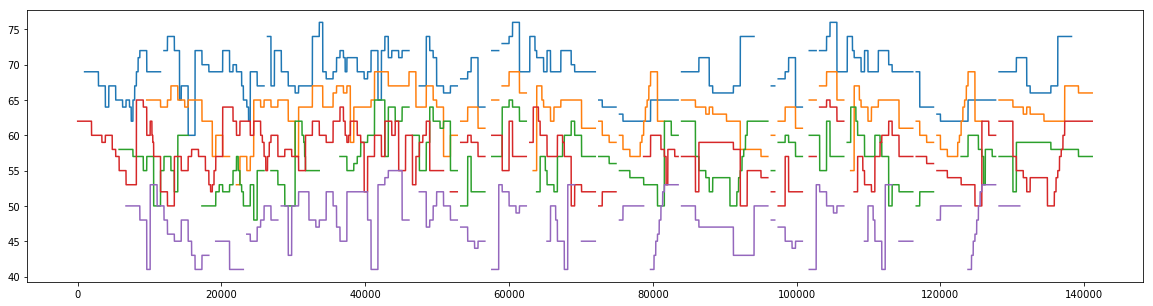

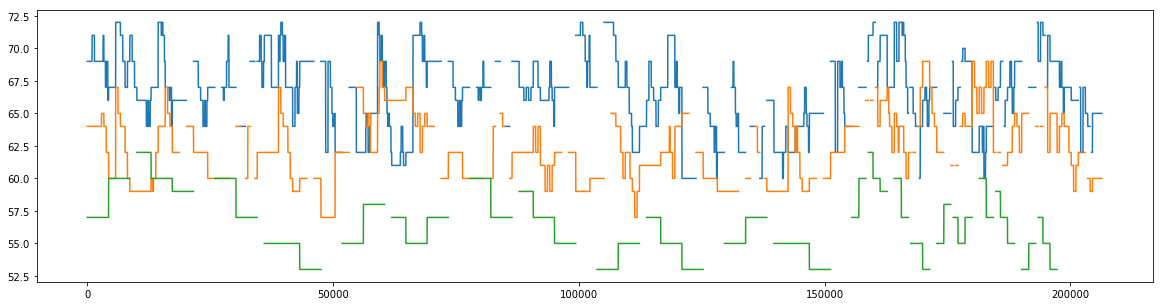

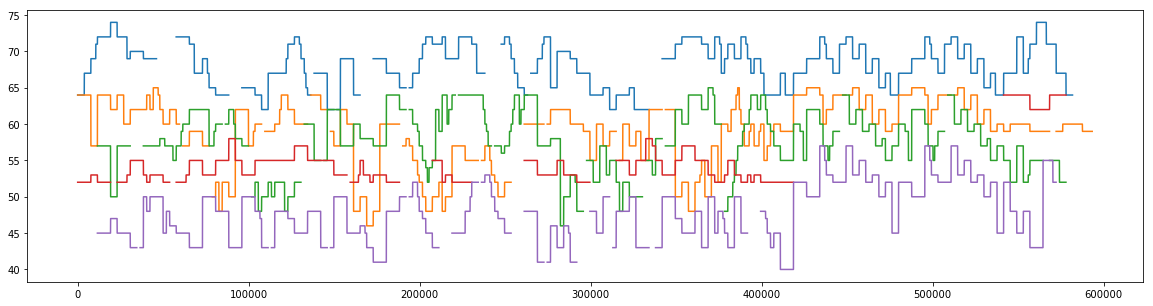

In [310]:
#Grafica Normalizada, duraciones sin direccionalidad

plt.figure(figsize = (20,5))
graficarvocesnor(ave_vnor)

plt.figure(figsize = (20,5))
graficarvocesnor(quant_vnor)

plt.figure(figsize = (20,5))
graficarvocesnor(desprez_vnor)

# Armonía

desprez_vnor

ave_vnor

quant_vnor

In [368]:
def armonia_por_punto(lista):
    armoniaporthick = {key:[] for key in range(0,len(lista[0]),120)} 
    for elem in armoniaporthick.keys():
        for x in lista:
            try:
                if x[elem] != None:
                    armoniaporthick[elem].append(x[elem])
            except IndexError:
                gotdata = 'null'
    return armoniaporthick


In [385]:
def norfromroot(listanormalizada, root):
    hola = listanormalizada
    for elem in hola:
        elem = [abs(root - x) for x in elem if x != None]
    return hola

In [386]:
desprez_arm60 = armonia_por_punto(desprez_vnor)
quant_arm60 = armonia_por_punto(quant_vnor)
ave_arm60 = armonia_por_punto(ave_vnor)
desprez_arm60

{0: [64, 64, 52],
 120: [64, 64, 52],
 240: [64, 64, 52],
 360: [64, 64, 52],
 480: [64, 64, 52],
 600: [64, 64, 52],
 720: [64, 64, 52],
 840: [64, 64, 52],
 960: [64, 64, 52],
 1080: [64, 64, 52],
 1200: [64, 64, 52],
 1320: [64, 64, 52],
 1440: [64, 64, 52],
 1560: [64, 64, 52],
 1680: [64, 64, 52],
 1800: [64, 64, 52],
 1920: [64, 64, 52],
 2040: [64, 64, 52],
 2160: [64, 64, 52],
 2280: [64, 64, 52],
 2400: [64, 64, 52],
 2520: [64, 64, 52],
 2640: [64, 64, 52],
 2760: [64, 64, 52],
 2880: [64, 64, 52],
 3000: [64, 64, 52],
 3120: [64, 64, 52],
 3240: [64, 64, 52],
 3360: [64, 64, 52],
 3480: [64, 64, 52],
 3600: [64, 64, 52],
 3720: [64, 64, 52],
 3840: [67, 64, 52],
 3960: [67, 64, 52],
 4080: [67, 64, 52],
 4200: [67, 64, 52],
 4320: [67, 64, 52],
 4440: [67, 64, 52],
 4560: [67, 64, 52],
 4680: [67, 64, 52],
 4800: [67, 64, 52],
 4920: [67, 64, 52],
 5040: [67, 64, 52],
 5160: [67, 64, 52],
 5280: [67, 64, 52],
 5400: [67, 64, 52],
 5520: [67, 64, 52],
 5640: [67, 64, 52],
 57

In [319]:
try:
    from collections import OrderedDict
except ImportError:
    OrderedDict = dict

In [358]:
def repeticiondesuceso(dictio):
    repeticiones = {}
    for value in dictio.values():
        str1 = ','.join(str(e) for e in value)
        if str1 in repeticiones:
            repeticiones[str1] = repeticiones[str1] + 1
        else:
            repeticiones[str1] = 0
    sorted_dict = OrderedDict(sorted(repeticiones.items(), key=lambda t: t[1]))
    return sorted_dict
            
a = repeticiondesuceso(desprez_arm60)
a

OrderedDict([('71,57,53', 7),
             ('64,57,53,50', 7),
             ('60,58,52,45', 7),
             ('60,57,52,45', 7),
             ('72,57,52,45', 7),
             ('72,59,52,45', 7),
             ('67,57,62,53,50', 7),
             ('65,50,57,53,50', 7),
             ('65,50,59,53,50', 7),
             ('50,60,58,43', 7),
             ('65,59,50,53,50', 7),
             ('64,60,48,55,48', 7),
             ('64,60,48,55,47', 7),
             ('67,62,52,55,48', 7),
             ('67,64,48,55,48', 7),
             ('69,64,48,55,48', 7),
             ('71,60,52,57,45', 7),
             ('67,60,60,57,45', 7),
             ('65,60,60,57,45', 7),
             ('64,48,60,53,45', 7),
             ('50,58,53,46', 7),
             ('50,58,53,45', 7),
             ('67,53,59,50', 7),
             ('72,48,52,45', 7),
             ('69,50,64,53', 7),
             ('69,50,60,53', 7),
             ('72,55,64,52,50', 7),
             ('67,55,62,52', 7),
             ('57,60,53', 7),
       

# Relacion Rítmica entre los eventos

In [335]:
def duracionador(lista):
    # debe ser lista única
    duraciones = []
    for x in range(1,len(lista)):
        duraciones.append((lista[x][1] - lista[x - 1][1]) / 480)
    return duraciones

In [393]:
def normalizar2(lista):
    eje = []
    for i in range(len(lista)-1):
        eje.extend([lista[i][1]] * (lista[i + 1][1] - lista[i][1]))
    eje.extend([lista[-1][1]] * 1920)
    return eje

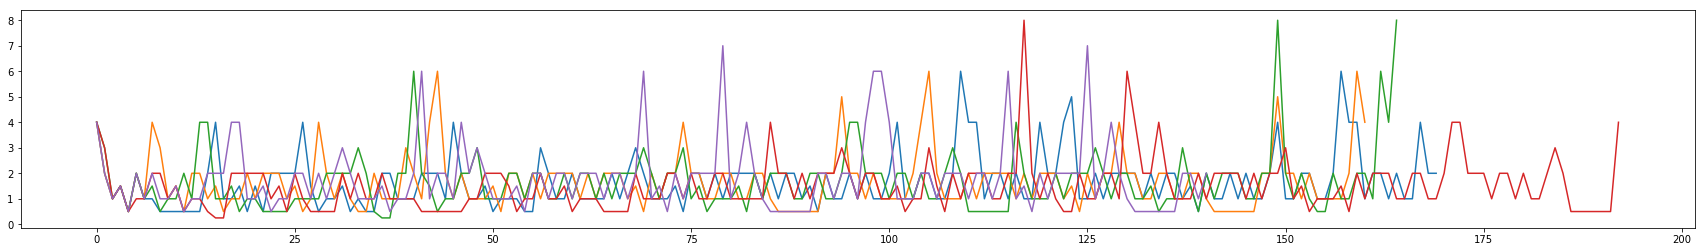

In [397]:
ave_dursop = duracionador(ave_dulc_sop)
ave_duralt = duracionador(ave_dulc_alt)
ave_durten = duracionador(ave_dulc_ten)
ave_durten2 = duracionador(ave_dulc_ten2)
ave_durbass = duracionador(ave_dulc_bass)
plt.figure(figsize = (30,4))
plt.plot(ave_dursop)
plt.plot(ave_duralt)
plt.plot(ave_durten)
plt.plot(ave_durten2)
plt.plot(ave_durbass)

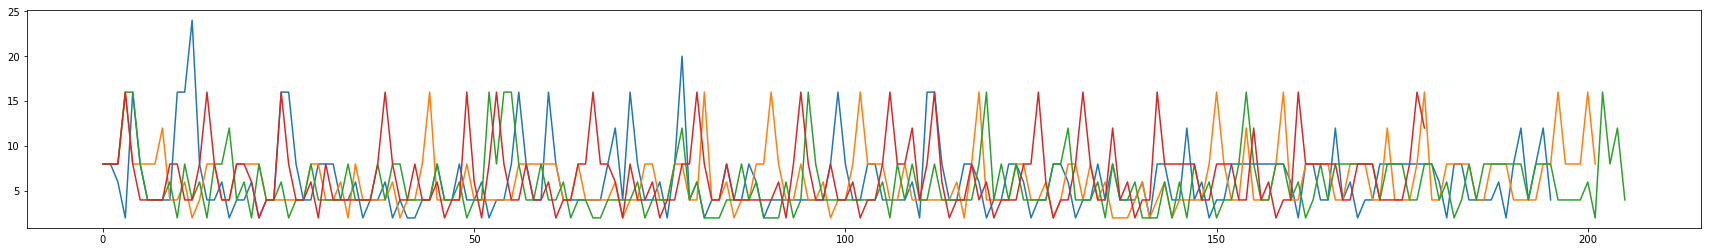

In [383]:
desprez_dursop = duracionador(desprez_nymph_sop)
desprez_duralt = duracionador(desprez_nymph_alt)
desprez_durten = duracionador(desprez_nymph_ten)
desprez_durten2 = duracionador(desprez_nymph_ten2)
desprez_durbass = duracionador(desprez_nymph_bass)
plt.figure(figsize = (30,4))
plt.plot(desprez_dursop)
plt.plot(desprez_duralt)
plt.plot(desprez_durten)
#plt.plot(desprez_durten2)
plt.plot(desprez_durbass)

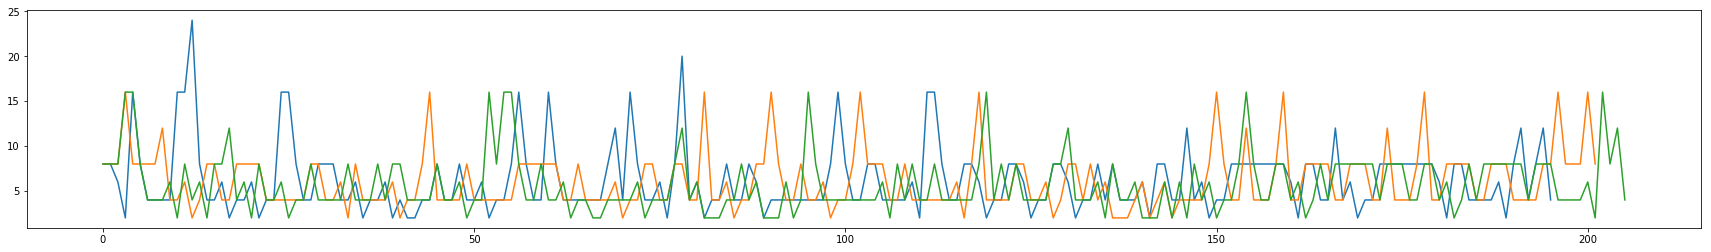

In [387]:
quant_durtriplum = duracionador(quant_triplum)
quant_durmotetus = duracionador(quant_motetus)
quant_durtenor = duracionador(quant_tenor)
plt.figure(figsize = (30,4))
plt.plot(desprez_dursop)
plt.plot(desprez_duralt)
plt.plot(desprez_durten)


In [399]:
#lineaspiyf
#curvas macroformales
#tablas dinamicas, modificar desde arribe
#cambiar datos dinamicamente
#revertir el orden de macroformal a datos discretos
#componiendo con recuperacion de información músical
#musiki instrumentos electronicos
#maquina hiler HIJER
#COMPOCISION ASISTIDA POR ORDENADOR CAC, open music
#trevor baca
#michel winter